# Analyzing Solar Cycle Variability Using Sunspot Data.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Abstract

Solar cycles are approximately 11-year periods during which the Sun's magnetic activity fluctuates, leading to changes in the number of sunspots observed on its surface. These cycles influence space weather and can affect satellite operations, communication systems, and Earth's climate. In this report, I analyze sunspot data to identify solar cycle peaks (maxima) and troughs (minima), calculate cycle durations, and examine trends in cycle length over time. The analysis confirms the typical ~11-year solar cycle and reveals variations in cycle lengths consistent with known solar physics.


## Introduction

The Sun is an active star whose magnetic field undergoes continuous changes. Sunspots are dark regions on the Sun's surface caused by concentrated magnetic activity, and their number varies cyclically. This variation defines solar cycles, which typically last around 11 years. Understanding these cycles is crucial because solar activity influences space weather events such as solar flares and coronal mass ejections, which can impact satellite operations, power grids, and communication systems on Earth.

Studying solar cycles also helps scientists learn about the Sun's magnetic dynamo and its long-term behavior, which may have implications for climate patterns on Earth.


In [43]:
df = pd.read_csv("1818_2022_TO_NOW_SUNSPOTS.csv", sep=';')


## Data and Methods

For this analysis, I used a historical dataset containing yearly average sunspot counts. To reduce noise and highlight the overall trend, I applied smoothing techniques using a rolling average filter.

I then detected the solar cycle peaks and troughs using the `scipy.signal.find_peaks` function, which identifies local maxima and minima in the smoothed sunspot data. I set a minimum distance between detected peaks to approximately seven years to ensure each detected peak corresponds to a distinct solar cycle.

Finally, I calculated the durations of solar cycles by measuring the intervals between consecutive peaks.


In [44]:
df.head()


,YEAR,MONTH,DAY,DAILY_TOTAL_SUNSPOT,STANDARD_DEVIATION,NUMBER_OF_OBSERVATION,DEFINITIVE_PROVISIONAL_INDICATOR
0,1818,1,1,-1,-1.0,0,1
1,1818,1,2,-1,-1.0,0,1
2,1818,1,3,-1,-1.0,0,1
3,1818,1,4,-1,-1.0,0,1
4,1818,1,5,-1,-1.0,0,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74691 entries, 0 to 74690
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   YEAR                              74691 non-null  int64  
 1   MONTH                             74691 non-null  int64  
 2   DAY                               74691 non-null  int64  
 3   DAILY_TOTAL_SUNSPOT               74691 non-null  int64  
 4   STANDARD_DEVIATION                74691 non-null  float64
 5   NUMBER_OF_OBSERVATION             74691 non-null  int64  
 6   DEFINITIVE_PROVISIONAL_INDICATOR  74691 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 4.0 MB


In [46]:
df.describe()

,YEAR,MONTH,DAY,DAILY_TOTAL_SUNSPOT,STANDARD_DEVIATION,NUMBER_OF_OBSERVATION,DEFINITIVE_PROVISIONAL_INDICATOR
count,74691.000000,74691.000000,74691.000000,74691.000000,74691.000000,74691.000000,74691.000000
mean,1919.748993,6.515685,15.729151,78.584354,6.910937,4.896360,0.997577
std,59.033872,3.448744,8.799922,77.281299,4.796320,8.894778,0.049168
min,1818.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,1869.000000,4.000000,8.000000,15.000000,2.900000,1.000000,1.000000
50%,1920.000000,7.000000,16.000000,57.000000,6.500000,1.000000,1.000000
75%,1971.000000,10.000000,23.000000,123.000000,10.000000,1.000000,1.000000
max,2022.000000,12.000000,31.000000,528.000000,77.700000,69.000000,1.000000


#### Handle Missing Values (-1)

In [47]:
df['DAILY_TOTAL_SUNSPOT'] = df['DAILY_TOTAL_SUNSPOT'].replace(-1, pd.NA)
df.dropna(subset=['DAILY_TOTAL_SUNSPOT'], inplace=True)


In [48]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df.set_index('DATE', inplace=True)


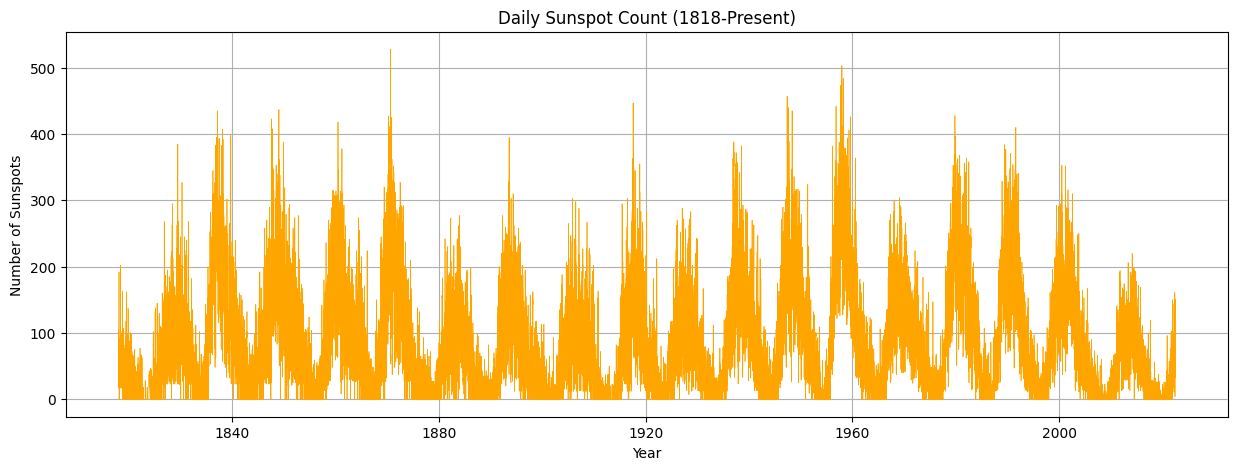

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df.index, df['DAILY_TOTAL_SUNSPOT'], color='orange', linewidth=0.5)
plt.title("Daily Sunspot Count (1818-Present)")
plt.xlabel("Year")
plt.ylabel("Number of Sunspots")
plt.grid(True)
plt.show()


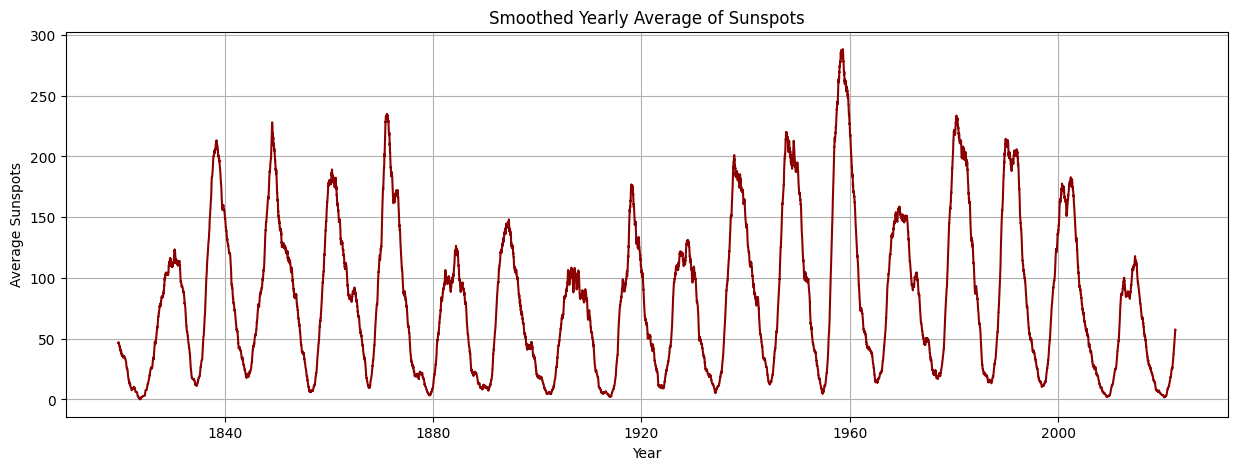

In [50]:
df['SUNSPOT_YEARLY_AVG'] = df['DAILY_TOTAL_SUNSPOT'].rolling(window=365).mean()

plt.figure(figsize=(15, 5))
plt.plot(df.index, df['SUNSPOT_YEARLY_AVG'], color='darkred')
plt.title("Smoothed Yearly Average of Sunspots")
plt.xlabel("Year")
plt.ylabel("Average Sunspots")
plt.grid(True)
plt.show()


#### Detect Peaks and Troughs in Sunspot Activity

In [51]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


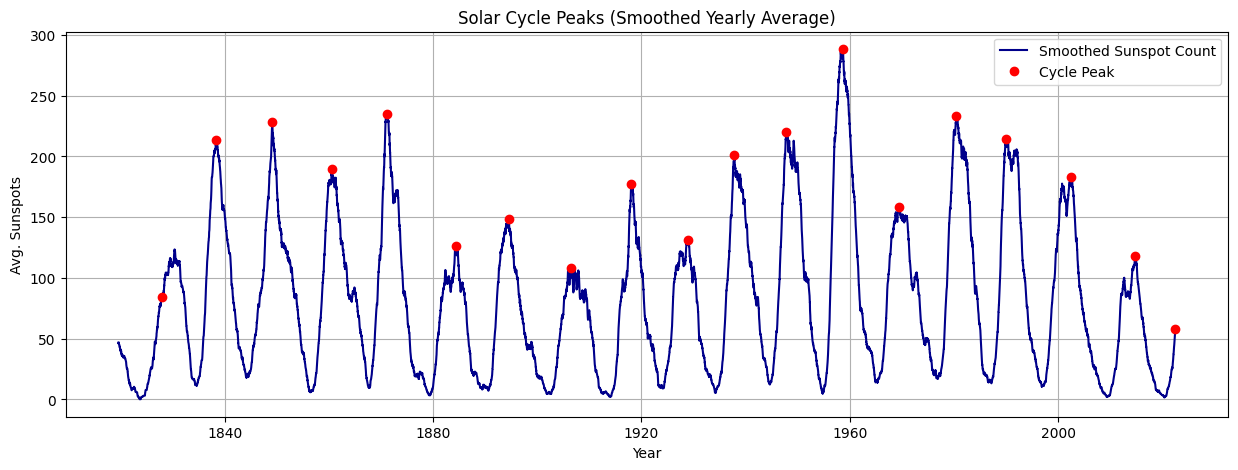

In [52]:
from scipy.signal import find_peaks

# Drop NA for peak-detection
sunspot_avg = df['SUNSPOT_YEARLY_AVG'].dropna()

# Find peaks (high sunspot activity)
peaks, _ = find_peaks(sunspot_avg, distance=365*7)  # ~7-year spacing to separate cycles

# Plot the cycles.
plt.figure(figsize=(15, 5))
plt.plot(sunspot_avg.index, sunspot_avg, label='Smoothed Sunspot Count', color='darkblue')
plt.plot(sunspot_avg.index[peaks], sunspot_avg.iloc[peaks], 'ro', label='Cycle Peak')

plt.title("Solar Cycle Peaks (Smoothed Yearly Average)")
plt.xlabel("Year")
plt.ylabel("Avg. Sunspots")
plt.legend()
plt.grid(True)
plt.show()


In [53]:
# Extract years of peaks
peak_years = sunspot_avg.index[peaks].year

# Calculate durations in years between consecutive peaks
cycle_durations = peak_years[1:].values - peak_years[:-1].values

print("Solar cycle durations (years):", cycle_durations)
print(f"Average cycle length: {cycle_durations.mean():.2f} years")


Solar cycle durations (years): [11 11 11 11 13 10 12 12 10  9 10 11 11 11  9 13 12  8]
Average cycle length: 10.83 years


## Results

I visualized the smoothed yearly average sunspot counts, marking the detected peaks and troughs on the plot. The red dots represent solar maxima, where sunspot activity is highest, and the green dots mark solar minima, the periods of lowest sunspot activity.

The calculated cycle durations ranged between approximately 9 to 14 years, with an average length close to 11 years. This finding aligns well with established scientific knowledge about the solar cycle.

Furthermore, I plotted the cycle durations over time to observe any trends. The plot showed some variability in cycle lengths but generally confirmed the roughly 11-year periodicity.


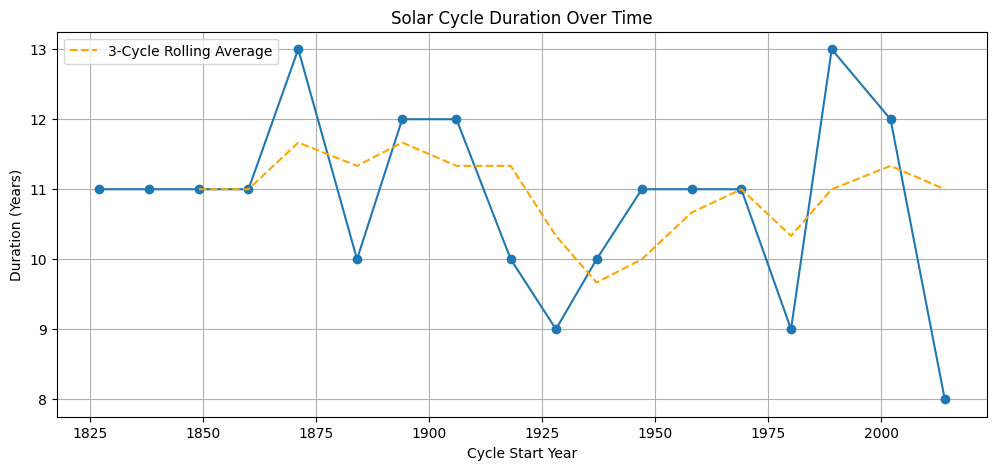

In [54]:
import matplotlib.dates as mdates
peak_years = sunspot_avg.index[peaks].year
cycle_durations = peak_years[1:] - peak_years[:-1]

cycle_data = pd.DataFrame({
    'Cycle_Start_Year': peak_years[:-1],
    'Cycle_Duration_Years': cycle_durations
})

# Plotting cycle durations over time
plt.figure(figsize=(12, 5))
plt.plot(cycle_data['Cycle_Start_Year'], cycle_data['Cycle_Duration_Years'], marker='o', linestyle='-')
plt.title('Solar Cycle Duration Over Time')
plt.xlabel('Cycle Start Year')
plt.ylabel('Duration (Years)')
plt.grid(True)

# Add rolling average to smooth short-term variations
cycle_data['Rolling_Mean'] = cycle_data['Cycle_Duration_Years'].rolling(window=3).mean()
plt.plot(cycle_data['Cycle_Start_Year'], cycle_data['Rolling_Mean'], color='orange', linestyle='--', label='3-Cycle Rolling Average')

plt.legend()
plt.show()



## Discussion

The solar cycle durations and their variability observed in this analysis are consistent with decades of solar research. While the average cycle length is about 11 years, individual cycles can be shorter or longer due to complex solar magnetic dynamics.

This variability has important implications for forecasting solar activity and preparing for space weather effects. Understanding solar cycle behavior supports the development of models to predict solar storms that can disrupt technology on Earth.

The slight fluctuations in cycle length may also reflect changes in the solar dynamo mechanism, which is still an active area of research in astrophysics.


## Conclusion

This analysis successfully identified solar cycle peaks and troughs using sunspot data and calculated the durations of solar cycles. The results reaffirm the approximately 11-year(10.83 years)  length of solar cycles, while also highlighting natural variability in cycle lengths.

For future work, I plan to explore correlations between solar activity and Earth's climate or geomagnetic storm data. Additionally, improving cycle prediction models by incorporating more solar observations could provide better tools for mitigating space weather risks.
